Epoch 1/50
117/117 [==============================] - 4s 19ms/step - loss: 2.9839e-04
Epoch 2/50
117/117 [==============================] - 2s 19ms/step - loss: 1.1029e-05
Epoch 3/50
117/117 [==============================] - 2s 19ms/step - loss: 1.0611e-05
Epoch 4/50
117/117 [==============================] - 2s 19ms/step - loss: 9.5075e-06
Epoch 5/50
117/117 [==============================] - 2s 19ms/step - loss: 9.0428e-06
Epoch 6/50
117/117 [==============================] - 2s 19ms/step - loss: 8.5801e-06
Epoch 7/50
117/117 [==============================] - 2s 19ms/step - loss: 8.1568e-06
Epoch 8/50
117/117 [==============================] - 2s 19ms/step - loss: 7.6155e-06
Epoch 9/50
117/117 [==============================] - 2s 19ms/step - loss: 7.6950e-06
Epoch 10/50
117/117 [==============================] - 2s 19ms/step - loss: 7.2615e-06
Epoch 11/50
117/117 [==============================] - 2s 19ms/step - loss: 6.7851e-06
Epoch 12/50
117/117 [==============================]

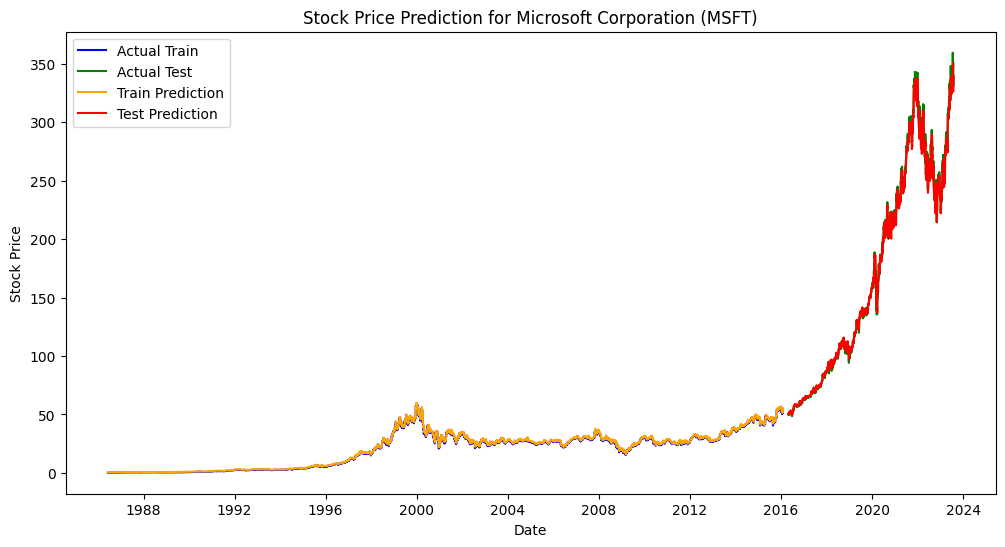

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Replace 'MSFT' with the stock symbol of Microsoft Corporation
stock_symbol = 'MSFT'

# Load stock price data from a CSV file
df = pd.read_csv(f'https://query1.finance.yahoo.com/v7/finance/download/{stock_symbol}?period1=0&period2=9999999999&interval=1d&events=history')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i: (i + sequence_length)]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 60  # You can adjust this value based on your needs
X_train = create_sequences(train_data, sequence_length)
X_test = create_sequences(test_data, sequence_length)

# Target variable
y_train = train_data['Close'][sequence_length:].values
y_test = test_data['Close'][sequence_length:].values

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Create arrays for the dates corresponding to the training and test data
train_dates = df.index[sequence_length:train_size]
test_dates = df.index[train_size + sequence_length:]

# Plot the results
plt.figure(figsize=(12, 6))

# Plot actual stock prices for training data (blue line)
plt.plot(train_dates, y_train[0], label='Actual Train', color='blue')

# Plot actual stock prices for test data (green line)
plt.plot(test_dates, y_test[0], label='Actual Test', color='green')

# Plot predicted stock prices for training data (orange line)
plt.plot(train_dates, train_predict[:, 0], label='Train Prediction', color='orange')

# Plot predicted stock prices for test data (red line)
plt.plot(test_dates, test_predict[:, 0], label='Test Prediction', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for Microsoft Corporation (MSFT)')
plt.legend()
plt.show()


